In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ADsP/main/01%EB%B3%B4%EC%8A%A4%ED%84%B4%EC%A7%91%EA%B0%92%EB%8D%B0%EC%9D%B4%ED%84%B0.csv")

In [5]:
data.head()

,범죄율,"25,000평방피트초과",비소매상업지역비율,찰스강경계,농축 일산화질소,가구당평균방수,1940년이전건축비율,직업센터접근성,도로접근성,재산세율,학생/교사비율,흑인비율,하위계층비율,주택가격
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


[01] CRIM 자치시(town) 별 1인당 범죄율 <br>
[02] ZN 25,000 평방피트를 초과하는 거주지역의 비율<br>
[03] INDUS 비소매상업지역이 점유하고 있는 토지의 비율<br>
[04] CHAS 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)<br>
[05] NOX 10ppm 당 농축 일산화질소<br>
[06] RM 주택 1가구당 평균 방의 개수<br>
[07] AGE 1940년 이전에 건축된 소유주택의 비율<br>
[08] DIS 5개의 보스턴 직업센터까지의 접근성 지수<br>
[09] RAD 방사형 도로까지의 접근성 지수<br>
[10] TAX 10,000 달러 당 재산세율<br>
[11] PTRATIO 자치시(town)별 학생/교사 비율<br>
[12] B 1000(Bk-0.63)^2, 여기서 Bk는 자치시별 흑인의 비율을 말함.<br>
[13] LSTAT 모집단의 하위계층의 비율(%)<br>
[14] MEDV 본인 소유의 주택가격(중앙값) (단위: $1,000)<br>

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   범죄율           506 non-null    float64
 1   25,000평방피트초과  506 non-null    float64
 2   비소매상업지역비율     506 non-null    float64
 3   찰스강경계         506 non-null    int64  
 4   농축 일산화질소      506 non-null    float64
 5   가구당평균방수       506 non-null    float64
 6   1940년이전건축비율   506 non-null    float64
 7   직업센터접근성       506 non-null    float64
 8   도로접근성         506 non-null    int64  
 9   재산세율          506 non-null    float64
 10  학생/교사비율       506 non-null    float64
 11  흑인비율          506 non-null    float64
 12  하위계층비율        506 non-null    float64
 13  주택가격          506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [7]:
data.describe()

,범죄율,"25,000평방피트초과",비소매상업지역비율,찰스강경계,농축 일산화질소,가구당평균방수,1940년이전건축비율,직업센터접근성,도로접근성,재산세율,학생/교사비율,흑인비율,하위계층비율,주택가격
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
data.columns

Index(['범죄율', '25,000평방피트초과', '비소매상업지역비율', '찰스강경계', '농축 일산화질소', '가구당평균방수',
       '1940년이전건축비율', '직업센터접근성', '도로접근성', '재산세율', '학생/교사비율', '흑인비율', '하위계층비율',
       '주택가격'],
      dtype='object')

<Axes: >

C:\Users\5-06\miniforge3\envs\fintech\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 48276 (\N{HANGUL SYLLABLE BEOM}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\5-06\miniforge3\envs\fintech\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51396 (\N{HANGUL SYLLABLE JOE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\5-06\miniforge3\envs\fintech\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\5-06\miniforge3\envs\fintech\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\5-06\miniforge3\envs\fintech\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\5-06\miniforge3\envs\finte

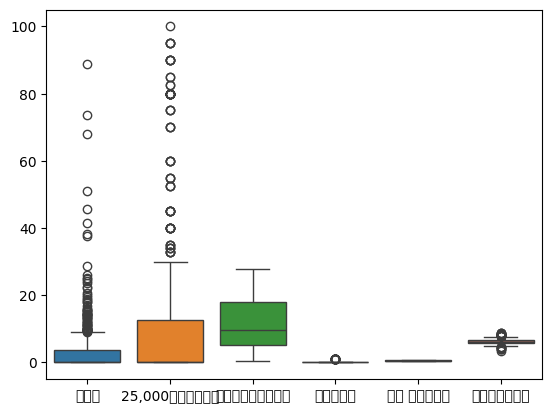

In [9]:
sns.boxplot(data[['범죄율', '25,000평방피트초과', '비소매상업지역비율', '찰스강경계', '농축 일산화질소', '가구당평균방수']])

<Axes: >

C:\Users\5-06\miniforge3\envs\fintech\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\5-06\miniforge3\envs\fintech\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\5-06\miniforge3\envs\fintech\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\5-06\miniforge3\envs\fintech\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\5-06\miniforge3\envs\fintech\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 52629 (\N{HANGUL SYLLABLE CUG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\5-06\miniforge3\envs\fintech\

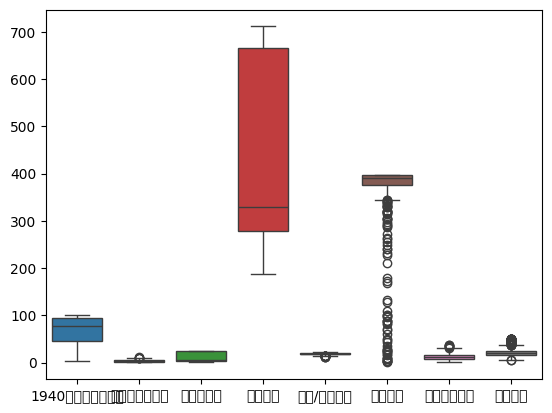

In [10]:
sns.boxplot(data[['1940년이전건축비율', '직업센터접근성', '도로접근성', '재산세율', '학생/교사비율', '흑인비율', '하위계층비율',
       '주택가격']])

In [11]:
outlier = data.describe()

In [12]:
outlier.loc['75%']+ (1.5*(outlier.loc['75%']-outlier.loc['25%']))

범죄율                9.069639
25,000평방피트초과      31.250000
비소매상업지역비율         37.465000
찰스강경계              0.000000
농축 일산화질소           0.886500
가구당평균방수            7.730500
1940년이전건축비율      167.650000
직업센터접근성            9.820800
도로접근성             54.000000
재산세율            1246.500000
학생/교사비율           24.400000
흑인비율             427.496250
하위계층비율            31.962500
주택가격              36.962500
dtype: float64

In [13]:
outlier.loc['25%']- (1.5*(outlier.loc['75%']-outlier.loc['25%']))

범죄율              -5.310511
25,000평방피트초과    -18.750000
비소매상업지역비율       -14.175000
찰스강경계             0.000000
농축 일산화질소          0.186500
가구당평균방수           4.778500
1940년이전건축비율     -28.550000
직업센터접근성          -2.532200
도로접근성           -26.000000
재산세율           -301.500000
학생/교사비율          13.200000
흑인비율            344.106250
하위계층비율           -8.057500
주택가격              5.062500
dtype: float64

In [14]:
data.corr(numeric_only=True)

,범죄율,"25,000평방피트초과",비소매상업지역비율,찰스강경계,농축 일산화질소,가구당평균방수,1940년이전건축비율,직업센터접근성,도로접근성,재산세율,학생/교사비율,흑인비율,하위계층비율,주택가격
범죄율,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
"25,000평방피트초과",-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
비소매상업지역비율,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
찰스강경계,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
농축 일산화질소,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
가구당평균방수,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
1940년이전건축비율,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
직업센터접근성,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
도로접근성,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
재산세율,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


C:\Users\5-06\miniforge3\envs\fintech\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 48276 (\N{HANGUL SYLLABLE BEOM}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\5-06\miniforge3\envs\fintech\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 51396 (\N{HANGUL SYLLABLE JOE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\5-06\miniforge3\envs\fintech\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\5-06\miniforge3\envs\fintech\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\5-06\miniforge3\envs\fintech\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\5-06\miniforge3\envs\fintech\lib\site-packages\seaborn\utils.py:61: UserWarn

<Axes: >

C:\Users\5-06\miniforge3\envs\fintech\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 48276 (\N{HANGUL SYLLABLE BEOM}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\5-06\miniforge3\envs\fintech\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51396 (\N{HANGUL SYLLABLE JOE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\5-06\miniforge3\envs\fintech\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\5-06\miniforge3\envs\fintech\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\5-06\miniforge3\envs\fintech\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\5-06\miniforge3\envs\finte

C:\Users\5-06\miniforge3\envs\fintech\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48276 (\N{HANGUL SYLLABLE BEOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\5-06\miniforge3\envs\fintech\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51396 (\N{HANGUL SYLLABLE JOE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\5-06\miniforge3\envs\fintech\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\5-06\miniforge3\envs\fintech\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\5-06\miniforge3\envs\fintech\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BAN

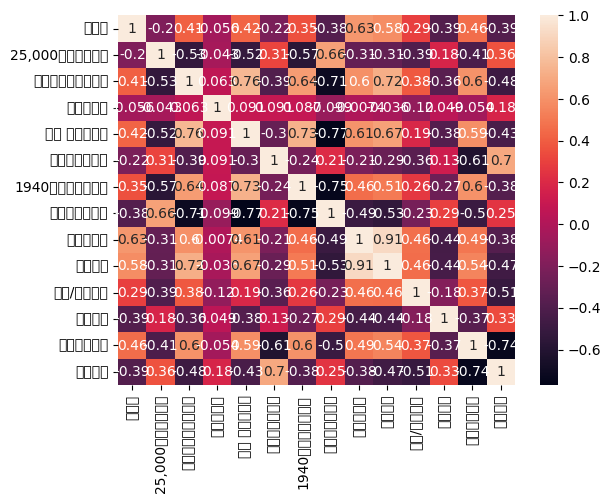

In [15]:
sns.heatmap(data.corr(numeric_only=True),annot=True)